# ADA - Projeto: Machine Learning I

Anna Vitória e Débora Gomes

Tema: Diagnóstico de Câncer de Mama

[Fonte dos Dados](https://www.kaggle.com/datasets/shubamsumbria/breast-cancer-prediction)

#Contexto:

Os dados mostram características que são calculadas a partir de uma imagem digitalizada de um aspirado com agulha fina de uma massa mamária. Essas características são utilizadas na determinação de tumores malignos ou benignos. Os dados foram obtidos  do Breast Cancer Wisconsin (Diagnostic) Data Set.

Quais dessas características é relacionada de forma mais significativa com o diagnóstico de um tumor maligno?

O quão precisos são os diagnósticos obtidos?

Técnicas utilizadas:

- Regressão Logística
- k-Nearest Neighbours (kNN)
- Decision Tree
- Random forest

## Carregando os Dados

In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli
import math

In [ ]:
cancer_df = pd.read_csv('data.csv')

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Analisando o dataset:

No dataset a seguir temos alguns dados relacionados ao diagnóstico do câncer de mama. São eles:

* diagnosis: 0 para benigno e 1 para maligno.
* radius_mean: o raio médio do tumor.
* texture_mean: a textura média do tumor.
* perimeter_mean: o perímetro médio do tumor.
* area_mean: a área média do tumor.
* ...

Cada linha representa um paciente.

In [ ]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
cancer_data = cancer_df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','symmetry_mean']]
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,symmetry_mean
0,1,17.99,10.38,122.80,1001.0,0.2419
1,1,20.57,17.77,132.90,1326.0,0.1812
2,1,19.69,21.25,130.00,1203.0,0.2069
3,1,11.42,20.38,77.58,386.1,0.2597
4,1,20.29,14.34,135.10,1297.0,0.1809


Não há valores nulos e temos 569 linhas e 6 colunas, listadas anteriormente.

In [ ]:
cancer_data.columns = ['diagnostico','raio','textura','perímetro','área','simetria']
cancer_data.head()

,diagnostico,raio,textura,perímetro,área,simetria
0,1,17.99,10.38,122.80,1001.0,0.2419
1,1,20.57,17.77,132.90,1326.0,0.1812
2,1,19.69,21.25,130.00,1203.0,0.2069
3,1,11.42,20.38,77.58,386.1,0.2597
4,1,20.29,14.34,135.10,1297.0,0.1809


### Análise Exploratória de Dados:

c:\Users\debor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


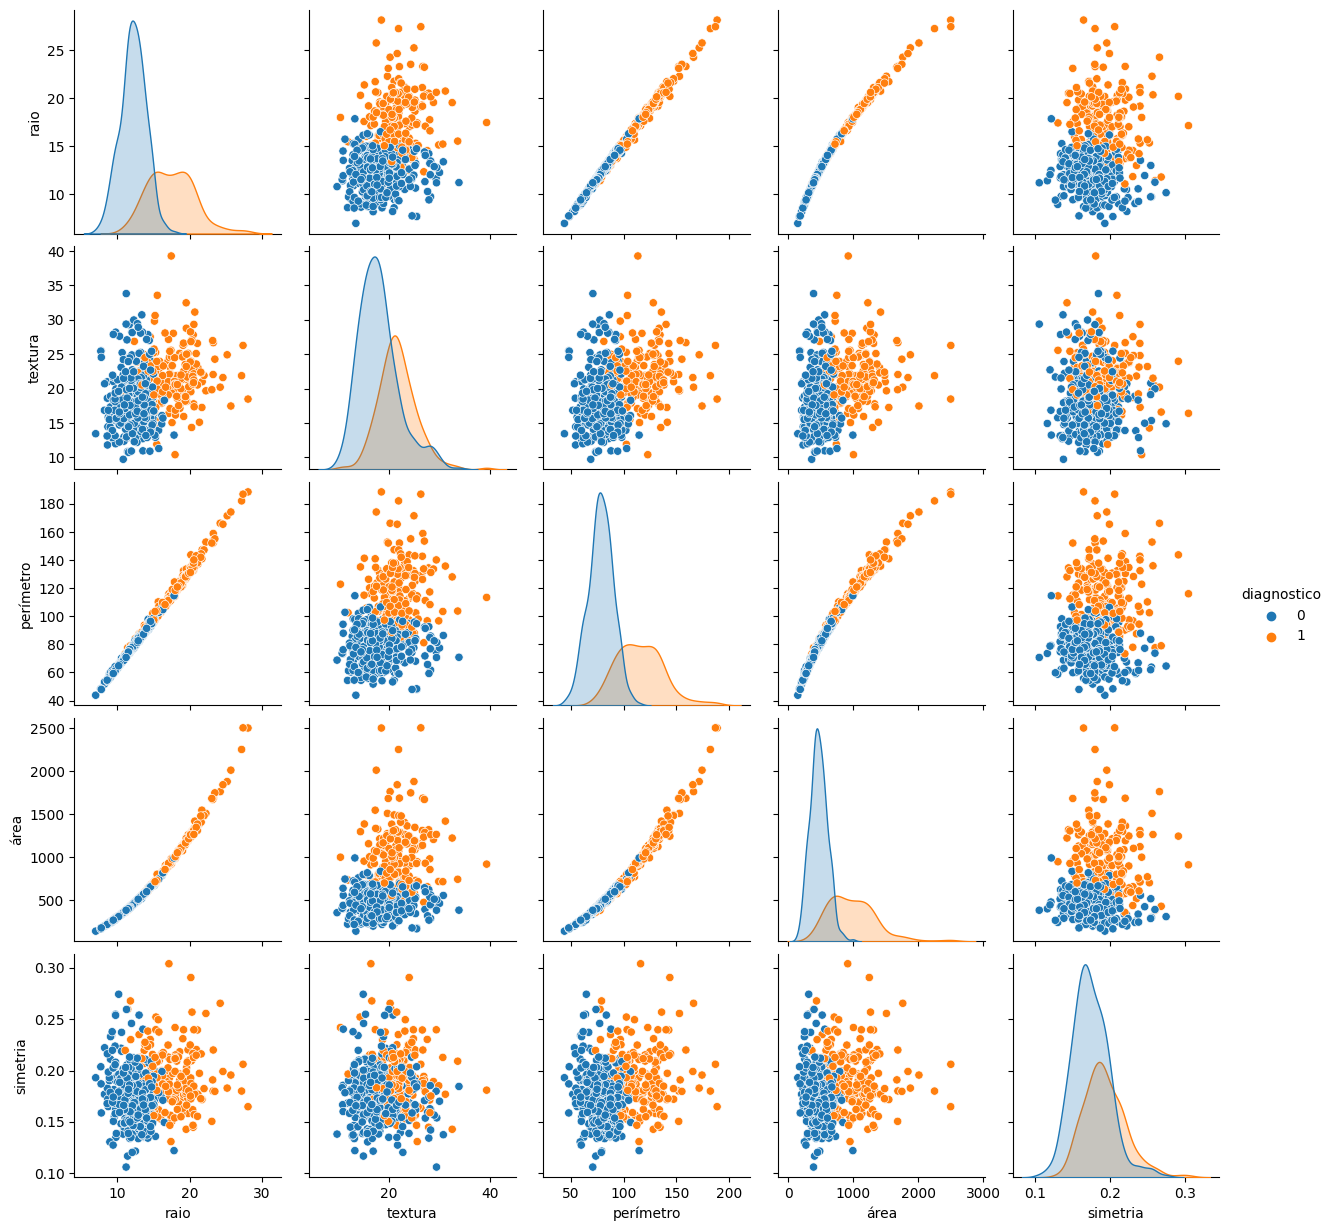

In [ ]:
sns.pairplot(data=cancer_data,hue='diagnostico')

<Axes: >

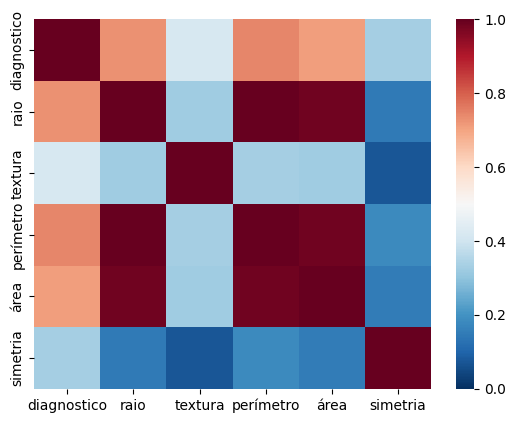

In [ ]:
sns.heatmap(data=cancer_data.corr(),cmap='RdBu_r',vmin=0)

A probabilidade de um diagnóstico ser malígno (k=1) ou benígno (k=0), segue a distribuição de Bernoulli:

In [ ]:
amostra = cancer_data['diagnostico']
print("Média: ", amostra.mean())
print("Frequência: ", len(amostra))

Média:  0.37258347978910367
Frequência:  569


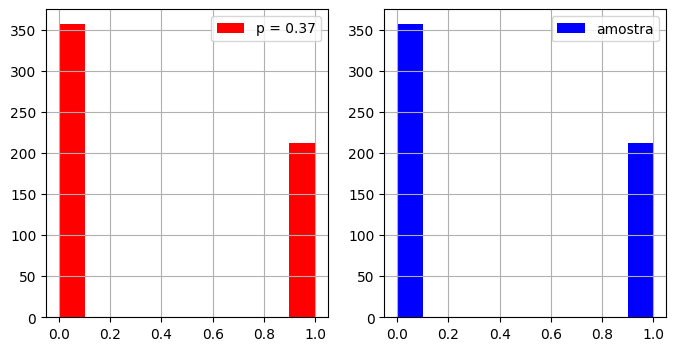

In [ ]:
modelo = bernoulli.rvs(size=569,p=0.37)

fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].hist(modelo,color='r',label="p = 0.37")
ax[0].grid()
ax[0].legend()

ax[1].hist(amostra.values,color='b', label="amostra")
ax[1].grid()
ax[1].legend()
plt.show()

In [ ]:
def normal_dist(x , mu, sigma):
    prob_density = (1/(sigma*(math.sqrt(2*np.pi))))*np.exp(-0.5*((x - mu)/sigma)**2)
    return prob_density

In [ ]:
amostra2 = cancer_data['raio']
print("Média: ", amostra2.mean())
print("Desvio: ", amostra2.std())
print("Frequência: ", len(amostra2))

Média:  14.127291739894552
Desvio:  3.5240488262120775
Frequência:  569


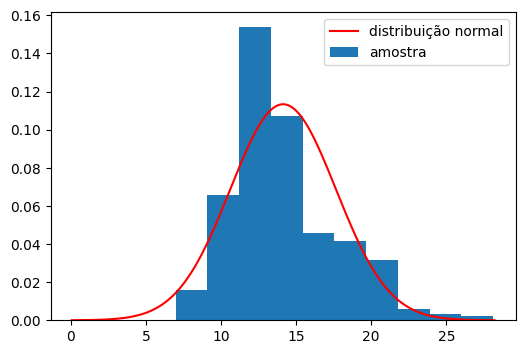

In [ ]:
# Define valores para média e desvio padrão (Obs.: sigma = sqrt(variância))
mu = 14.13
sigma = 3.52

# Define o tamanho de uma figura para o gráfico
plt.figure(figsize=(6,4))

# Define os valores de x entre o mínimo e máximo para gerarmos a curva normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 569)

# Dados para a curva normal
pdf = normal_dist(x, mu, sigma)

# Gera a curva normal
plt.plot(x, pdf, color = 'red',label='distribuição normal')

plt.hist(amostra2,density=True,label='amostra')
plt.legend()
# Mostra o gráfico
plt.show()

In [ ]:
r_maligno = cancer_data[cancer_data['diagnostico']==1]['raio']
print("Raio médio (maligno): ", r_maligno.mean())
print("Desvio (maligno): ", r_maligno.std())
print("Frequência (maligno): ", len(r_maligno))

Raio médio (maligno):  17.462830188679245
Desvio (maligno):  3.203971100779367
Frequência (maligno):  212


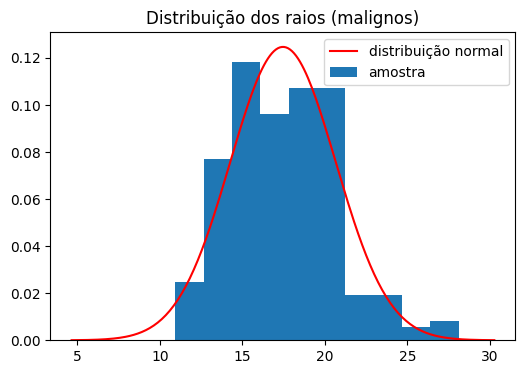

In [ ]:
# Define valores para média e desvio padrão (Obs.: sigma = sqrt(variância))
mu = 17.46
sigma = 3.2

# Define o tamanho de uma figura para o gráfico
plt.figure(figsize=(6,4))

# Define os valores de x entre o mínimo e máximo para gerarmos a curva normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 212)

# Dados para a curva normal
pdf = normal_dist(x, mu, sigma)

plt.title('Distribuição dos raios (malignos)')

# Gera a curva normal
plt.plot(x, pdf, color = 'red',label='distribuição normal')

plt.hist(r_maligno,density=True,label='amostra',bins=10)
plt.legend()
# Mostra o gráfico
plt.show()

In [ ]:
r_benigno = cancer_data[cancer_data['diagnostico']==0]['raio']
print("Raio médio (benigno): ", r_benigno.mean())
print("Desvio (benigno): ", r_benigno.std())
print("Frequência (benigno): ", len(r_benigno))

Raio médio (benigno):  12.146523809523808
Desvio (benigno):  1.7805116461410393
Frequência (benigno):  357


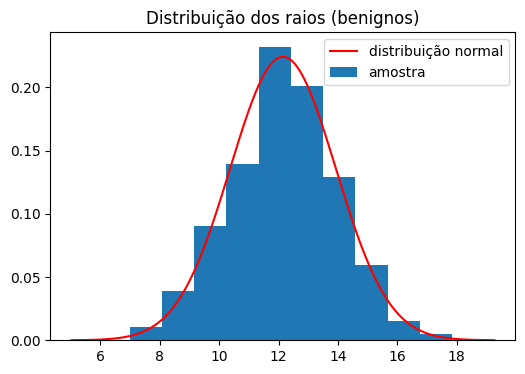

In [ ]:
# Define valores para média e desvio padrão (Obs.: sigma = sqrt(variância))
mu = 12.15
sigma = 1.78

# Define o tamanho de uma figura para o gráfico
plt.figure(figsize=(6,4))

# Define os valores de x entre o mínimo e máximo para gerarmos a curva normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 357)

# Dados para a curva normal
pdf = normal_dist(x, mu, sigma)

plt.title('Distribuição dos raios (benignos)')
# Gera a curva normal
plt.plot(x, pdf, color = 'red',label='distribuição normal')

plt.hist(r_benigno,density=True,label='amostra')
plt.legend()
# Mostra o gráfico
plt.show()

Tumores malignos costumam ser mais irregulares:
https://www.mdsaude.com/oncologia/sintomas-cancer/#:~:text=Um%20n%C3%B3dulo%20maligno%20costuma%20ser,podem%20indicar%20c%C3%A2ncer%20de%20mama.